In [1]:
from vizdoom import *
import random
import time
import numpy as np
from matplotlib import pyplot as plt
#import enviroment base class from openai gym
from gym import Env
#import gym spaces
from gym.spaces import Discrete,Box
#import opencv
import cv2

In [55]:
game = DoomGame()
game.load_config('github/VizDoom/scenarios/basic.cfg')
game.init()

In [54]:
actions = np.identity(3,dtype=np.uint8)

In [4]:
random.choice(actions)

array([0, 0, 1], dtype=uint8)

In [5]:
game.new_episode()

In [6]:
game.is_episode_finished()

False

In [52]:
game.make_action(random.choice(actions))

-1.0

In [56]:
episodes = 10
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        info = state.game_variables
        reward = game.make_action(random.choice(actions))
        print('reward:',reward)
        time.sleep(0.02)
    print('Result:',game.get_total_reward())
    time.sleep(2)
        

reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0

reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0

In [57]:
game.close()

In [10]:
Box(low=0,high=10,shape=(10,10),dtype=np.uint8).sample()

array([[ 1,  3,  8,  6,  9,  6,  2,  4, 10,  1],
       [10,  4,  9,  9,  7,  5,  9,  4,  6,  9],
       [ 8,  8,  1, 10,  3,  0,  3,  4,  0,  0],
       [ 9,  1,  8, 10,  3,  5,  7,  7,  0,  4],
       [ 0,  2,  5,  6,  7,  7,  3,  0, 10,  6],
       [ 2,  0,  2,  2,  6,  4,  4,  4,  1, 10],
       [ 2,  0,  1,  3,  3,  2,  4,  3,  3,  5],
       [ 4,  7,  8,  7,  4, 10, 10,  7,  0,  1],
       [ 2,  9,  9,  1, 10, 10,  3,  5,  8,  1],
       [ 0,  2,  4, 10,  4,  4,  8,  7,  7,  8]], dtype=uint8)

In [11]:
game.get_state().screen_buffer.shape

AttributeError: 'NoneType' object has no attribute 'screen_buffer'

In [12]:
Discrete(3).sample()

0

In [13]:
actions[Discrete(3).sample()]

array([1, 0, 0], dtype=uint8)

In [14]:
class VizDoomGym(Env):
    #Function that is called when we start the env
    def __init__(self, render=False):
        #inherit from Env
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('github/VizDoom/scenarios/basic.cfg')
       
        #Render frame Logic
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        self.game.init()
        #Create the action
        self.observation_space = Box(low=0,high=255,shape=(100,160,1),dtype=np.uint8)
        self.action_space = Discrete(3)
        
    # This is how we take a step in the enviroment   
    def step(self,action):
        #Specify action and take step
        actions = np.identity(3,dtype=np.uint8)
        reward = self.game.make_action(actions[action],4)
        
        # Get all the other stuff we need to return 
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
            
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        
        return state,reward,done,info
    def render():
        pass
    
    #what happpeens when we start a new game
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    def grayscale(self , observation):
        gray = cv2.cvtColor(np.moveaxis(observation,0,-1),cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray,(160,100),interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize,(100,160,1))
        return state
   
    #Call to close down the game
    def close(self):
        self.game.close()

In [21]:
env = VizDoomGym(render=True)

In [16]:
state = env.reset()

In [17]:
state.shape

(100, 160, 1)

In [18]:
env.close()

In [22]:
from stable_baselines3.common import env_checker

In [23]:
env_checker.check_env(env)

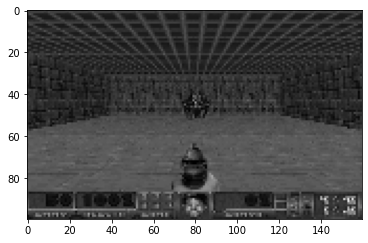

In [24]:
plt.imshow(cv2.cvtColor(state,cv2.COLOR_BGR2RGB))

In [25]:
#import os for file nav
import os
#import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [26]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/logs_basic'

In [27]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self,check_freq,save_path,verbose=1):
        super(TrainAndLoggingCallback,self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path,exist_ok = True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path,'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        
        return True
    

In [28]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

In [29]:
#import ppo for training
from stable_baselines3 import PPO

In [30]:
#Non rendered enviroment
env = VizDoomGym()

In [31]:
model = PPO('CnnPolicy',env,tensorboard_log=LOG_DIR,verbose=1,learning_rate=0.0001,n_steps=200)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


D:\software\Anaconda\lib\site-packages\stable_baselines3\ppo\ppo.py:145: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 200`, after every 3 untruncated mini-batches, there will be a truncated mini-batch of size 8
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=200 and n_envs=1)
  warnings.warn(


In [32]:
model.learn(total_timesteps=100000,callback=callback)

Logging to ./logs/logs_basic\PPO_8


KeyboardInterrupt: 

In [33]:
#import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [40]:
model= PPO.load('./train/train_basic/best_model_60000')

In [41]:
#creat
evn= VizDoomGym(render=True)

In [42]:
#evaluate mean reward for 10 games
mean_reward,_ = evaluate_policy(model,env,n_eval_episodes=100)

In [43]:
env.close()